In [1]:
import numpy as np
import pandas as pd 
from scipy.io import arff
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("waterquality.csv")

In [2]:
df.head()

,STATION CODE,LOCATIONS,STATE,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,1312,"GODAVARI AT JAYAKWADI DAM, AURNAGABAD,MAHARASHTRA",MAHARASHTRA,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0
1,2177,GODAVARI RIVER NEAR SOMESHWAR TEMPLE.,MAHARASHTRA,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0
2,2182,GODAVARI RIVER AT SAIKHEDA.,MAHARASHTRA,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0
3,2179,"GODAVARI RIVER AT HANUMAN GHAT, NASHIK CITY.",MAHARASHTRA,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0
4,2183,GODAVARI RIVER AT NANDUR- MADMESHWAR DAM.,MAHARASHTRA,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   STATION CODE         534 non-null    int64  
 1   LOCATIONS            534 non-null    object 
 2   STATE                534 non-null    object 
 3   TEMP                 529 non-null    float64
 4   DO                   532 non-null    float64
 5   pH                   534 non-null    float64
 6   CONDUCTIVITY         504 non-null    float64
 7   BOD                  528 non-null    float64
 8   NITRATE_N_NITRITE_N  532 non-null    float64
 9   FECAL_COLIFORM       452 non-null    float64
 10  TOTAL_COLIFORM       495 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 46.0+ KB


In [4]:
df.isnull().sum()

STATION CODE            0
LOCATIONS               0
STATE                   0
TEMP                    5
DO                      2
pH                      0
CONDUCTIVITY           30
BOD                     6
NITRATE_N_NITRITE_N     2
FECAL_COLIFORM         82
TOTAL_COLIFORM         39
dtype: int64

In [5]:
df['TEMP'] = df['TEMP'].fillna(value=df['TEMP'].median())
df['DO'] = df['DO'].fillna(value=df['DO'].median())
df['CONDUCTIVITY'] = df['CONDUCTIVITY'].fillna(value=df['CONDUCTIVITY'].median())
df['BOD'] = df['BOD'].fillna(value=df['BOD'].median())
df['NITRATE_N_NITRITE_N'] = df['NITRATE_N_NITRITE_N'].fillna(value=df['NITRATE_N_NITRITE_N'].median())
df['FECAL_COLIFORM'] = df['FECAL_COLIFORM'].fillna(value=df['FECAL_COLIFORM'].median())
df['TOTAL_COLIFORM'] = df['TOTAL_COLIFORM'].fillna(value=df['TOTAL_COLIFORM'].median())

In [6]:
df.isnull().sum()

STATION CODE           0
LOCATIONS              0
STATE                  0
TEMP                   0
DO                     0
pH                     0
CONDUCTIVITY           0
BOD                    0
NITRATE_N_NITRITE_N    0
FECAL_COLIFORM         0
TOTAL_COLIFORM         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   STATION CODE         534 non-null    int64  
 1   LOCATIONS            534 non-null    object 
 2   STATE                534 non-null    object 
 3   TEMP                 534 non-null    float64
 4   DO                   534 non-null    float64
 5   pH                   534 non-null    float64
 6   CONDUCTIVITY         534 non-null    float64
 7   BOD                  534 non-null    float64
 8   NITRATE_N_NITRITE_N  534 non-null    float64
 9   FECAL_COLIFORM       534 non-null    float64
 10  TOTAL_COLIFORM       534 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 46.0+ KB


In [9]:
df = df.drop(['STATION CODE','LOCATIONS','STATE'], axis=1)

In [11]:
#Min-Max Scalling 
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
df = pd.DataFrame(scaled_data, columns=["TEMP", "DO", "pH", "CONDUCTIVITY", "BOD",'NITRATE_N_NITRITE_N','FECAL_COLIFORM','TOTAL_COLIFORM'])


In [12]:
df.head()

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,0.802575,0.392638,0.214286,0.028972,0.042440,0.043956,0.000010,0.000003
1,0.600858,0.368098,0.202381,0.009616,0.038462,0.043956,0.000232,0.000008
2,0.656652,0.337423,0.178571,0.013154,0.053050,0.197802,0.000190,0.000006
3,0.613734,0.337423,0.178571,0.013820,0.071618,0.078022,0.000290,0.000012
4,0.652361,0.349693,0.190476,0.010615,0.039788,0.059121,0.000145,0.000006


In [13]:
from sklearn.cluster import KMeans

In [14]:
## we are applying K-means and trying to find the cost(intra cluster distance
cost = []
n_cluster = []
for k in range (1, 10):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1)
    kmeans_model.fit(df)

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    
    labels = kmeans_model.labels_

    # Sum of distances of samples to their closest cluster center
    interia = kmeans_model.inertia_
    print("k:",k, " cost:", interia)
    cost.append(interia)
    n_cluster.append(k)

c:\psm\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\psm\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\psm\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\psm\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 1  cost: 37.77814536917332
k: 2  cost: 30.365235499978652
k: 3  cost: 24.344445862297597
k: 4  cost: 21.704711679046085
k: 5  cost: 19.491774858999328


c:\psm\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\psm\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\psm\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\psm\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\psm\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'au

k: 6  cost: 17.888163426994467
k: 7  cost: 15.742543422493664
k: 8  cost: 14.060534540761457
k: 9  cost: 12.897729768240184


In [15]:
cost

[37.77814536917332,
 30.365235499978652,
 24.344445862297597,
 21.704711679046085,
 19.491774858999328,
 17.888163426994467,
 15.742543422493664,
 14.060534540761457,
 12.897729768240184]

In [16]:
n_cluster

[1, 2, 3, 4, 5, 6, 7, 8, 9]

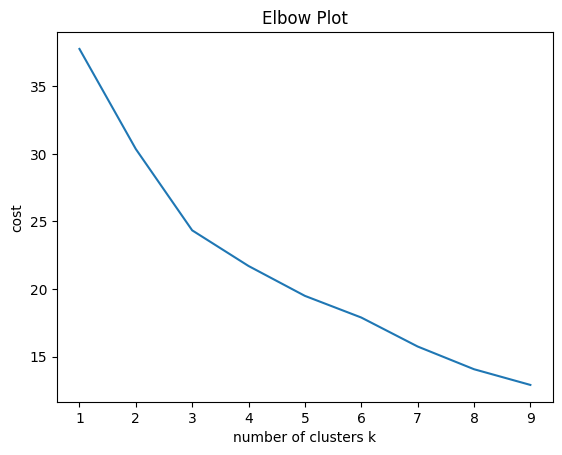

In [17]:
import matplotlib.pyplot as plt
  
# plotting the points 
plt.plot(n_cluster, cost)
  
# naming the x axis
plt.xlabel('number of clusters k')
# naming the y axis
plt.ylabel('cost')
  
# giving a title to my graph
plt.title('Elbow Plot')
  
# function to show the plot
plt.show()

In [28]:
kmeans_model = KMeans(n_clusters=2, random_state=1)
kmeans_model.fit(df)
# Selected K = 2 as optimum value of k or number of clusters
labels = kmeans_model.labels_

c:\psm\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [29]:
labels_df = pd.DataFrame(labels)

In [30]:
labels_df.columns = ['potability']

In [31]:
labels_df.head(2)

,potability
0,1
1,0


In [32]:
df.head()

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,0.802575,0.392638,0.214286,0.028972,0.042440,0.043956,0.000010,0.000003
1,0.600858,0.368098,0.202381,0.009616,0.038462,0.043956,0.000232,0.000008
2,0.656652,0.337423,0.178571,0.013154,0.053050,0.197802,0.000190,0.000006
3,0.613734,0.337423,0.178571,0.013820,0.071618,0.078022,0.000290,0.000012
4,0.652361,0.349693,0.190476,0.010615,0.039788,0.059121,0.000145,0.000006


In [33]:
output = pd.concat([df,labels_df],axis =1)

In [34]:
output

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM,potability
0,0.802575,0.392638,0.214286,0.028972,0.042440,0.043956,0.000010,3.023093e-06,1
1,0.600858,0.368098,0.202381,0.009616,0.038462,0.043956,0.000232,7.599720e-06,0
2,0.656652,0.337423,0.178571,0.013154,0.053050,0.197802,0.000190,5.542337e-06,1
3,0.613734,0.337423,0.178571,0.013820,0.071618,0.078022,0.000290,1.184045e-05,1
4,0.652361,0.349693,0.190476,0.010615,0.039788,0.059121,0.000145,5.500350e-06,1
...,...,...,...,...,...,...,...,...,...
529,0.545064,0.269939,0.214286,0.020772,0.013263,0.021978,0.000016,5.458363e-07,0
530,0.532189,0.343558,0.250000,0.022978,0.011936,0.065934,0.000013,2.939118e-07,0
531,0.532189,0.355828,0.261905,0.022853,0.013263,0.065934,0.000013,2.099370e-07,0
532,0.781116,0.251534,0.190476,0.045540,0.027851,0.043956,0.000023,2.771169e-06,1


<AxesSubplot: xlabel='pH', ylabel='BOD'>

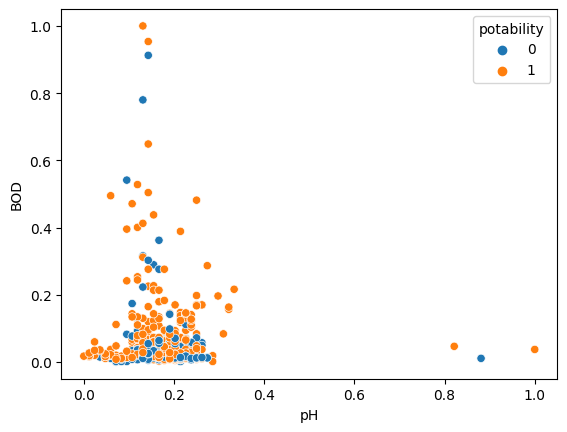

In [35]:
import seaborn as sns
sns.scatterplot(data=output, x="pH", y="BOD", hue="potability")

<AxesSubplot: xlabel='CONDUCTIVITY', ylabel='BOD'>

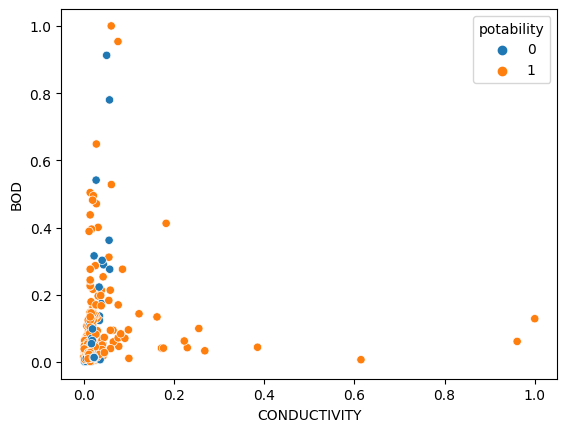

In [36]:
sns.scatterplot(data=output, x="CONDUCTIVITY", y="BOD", hue="potability")

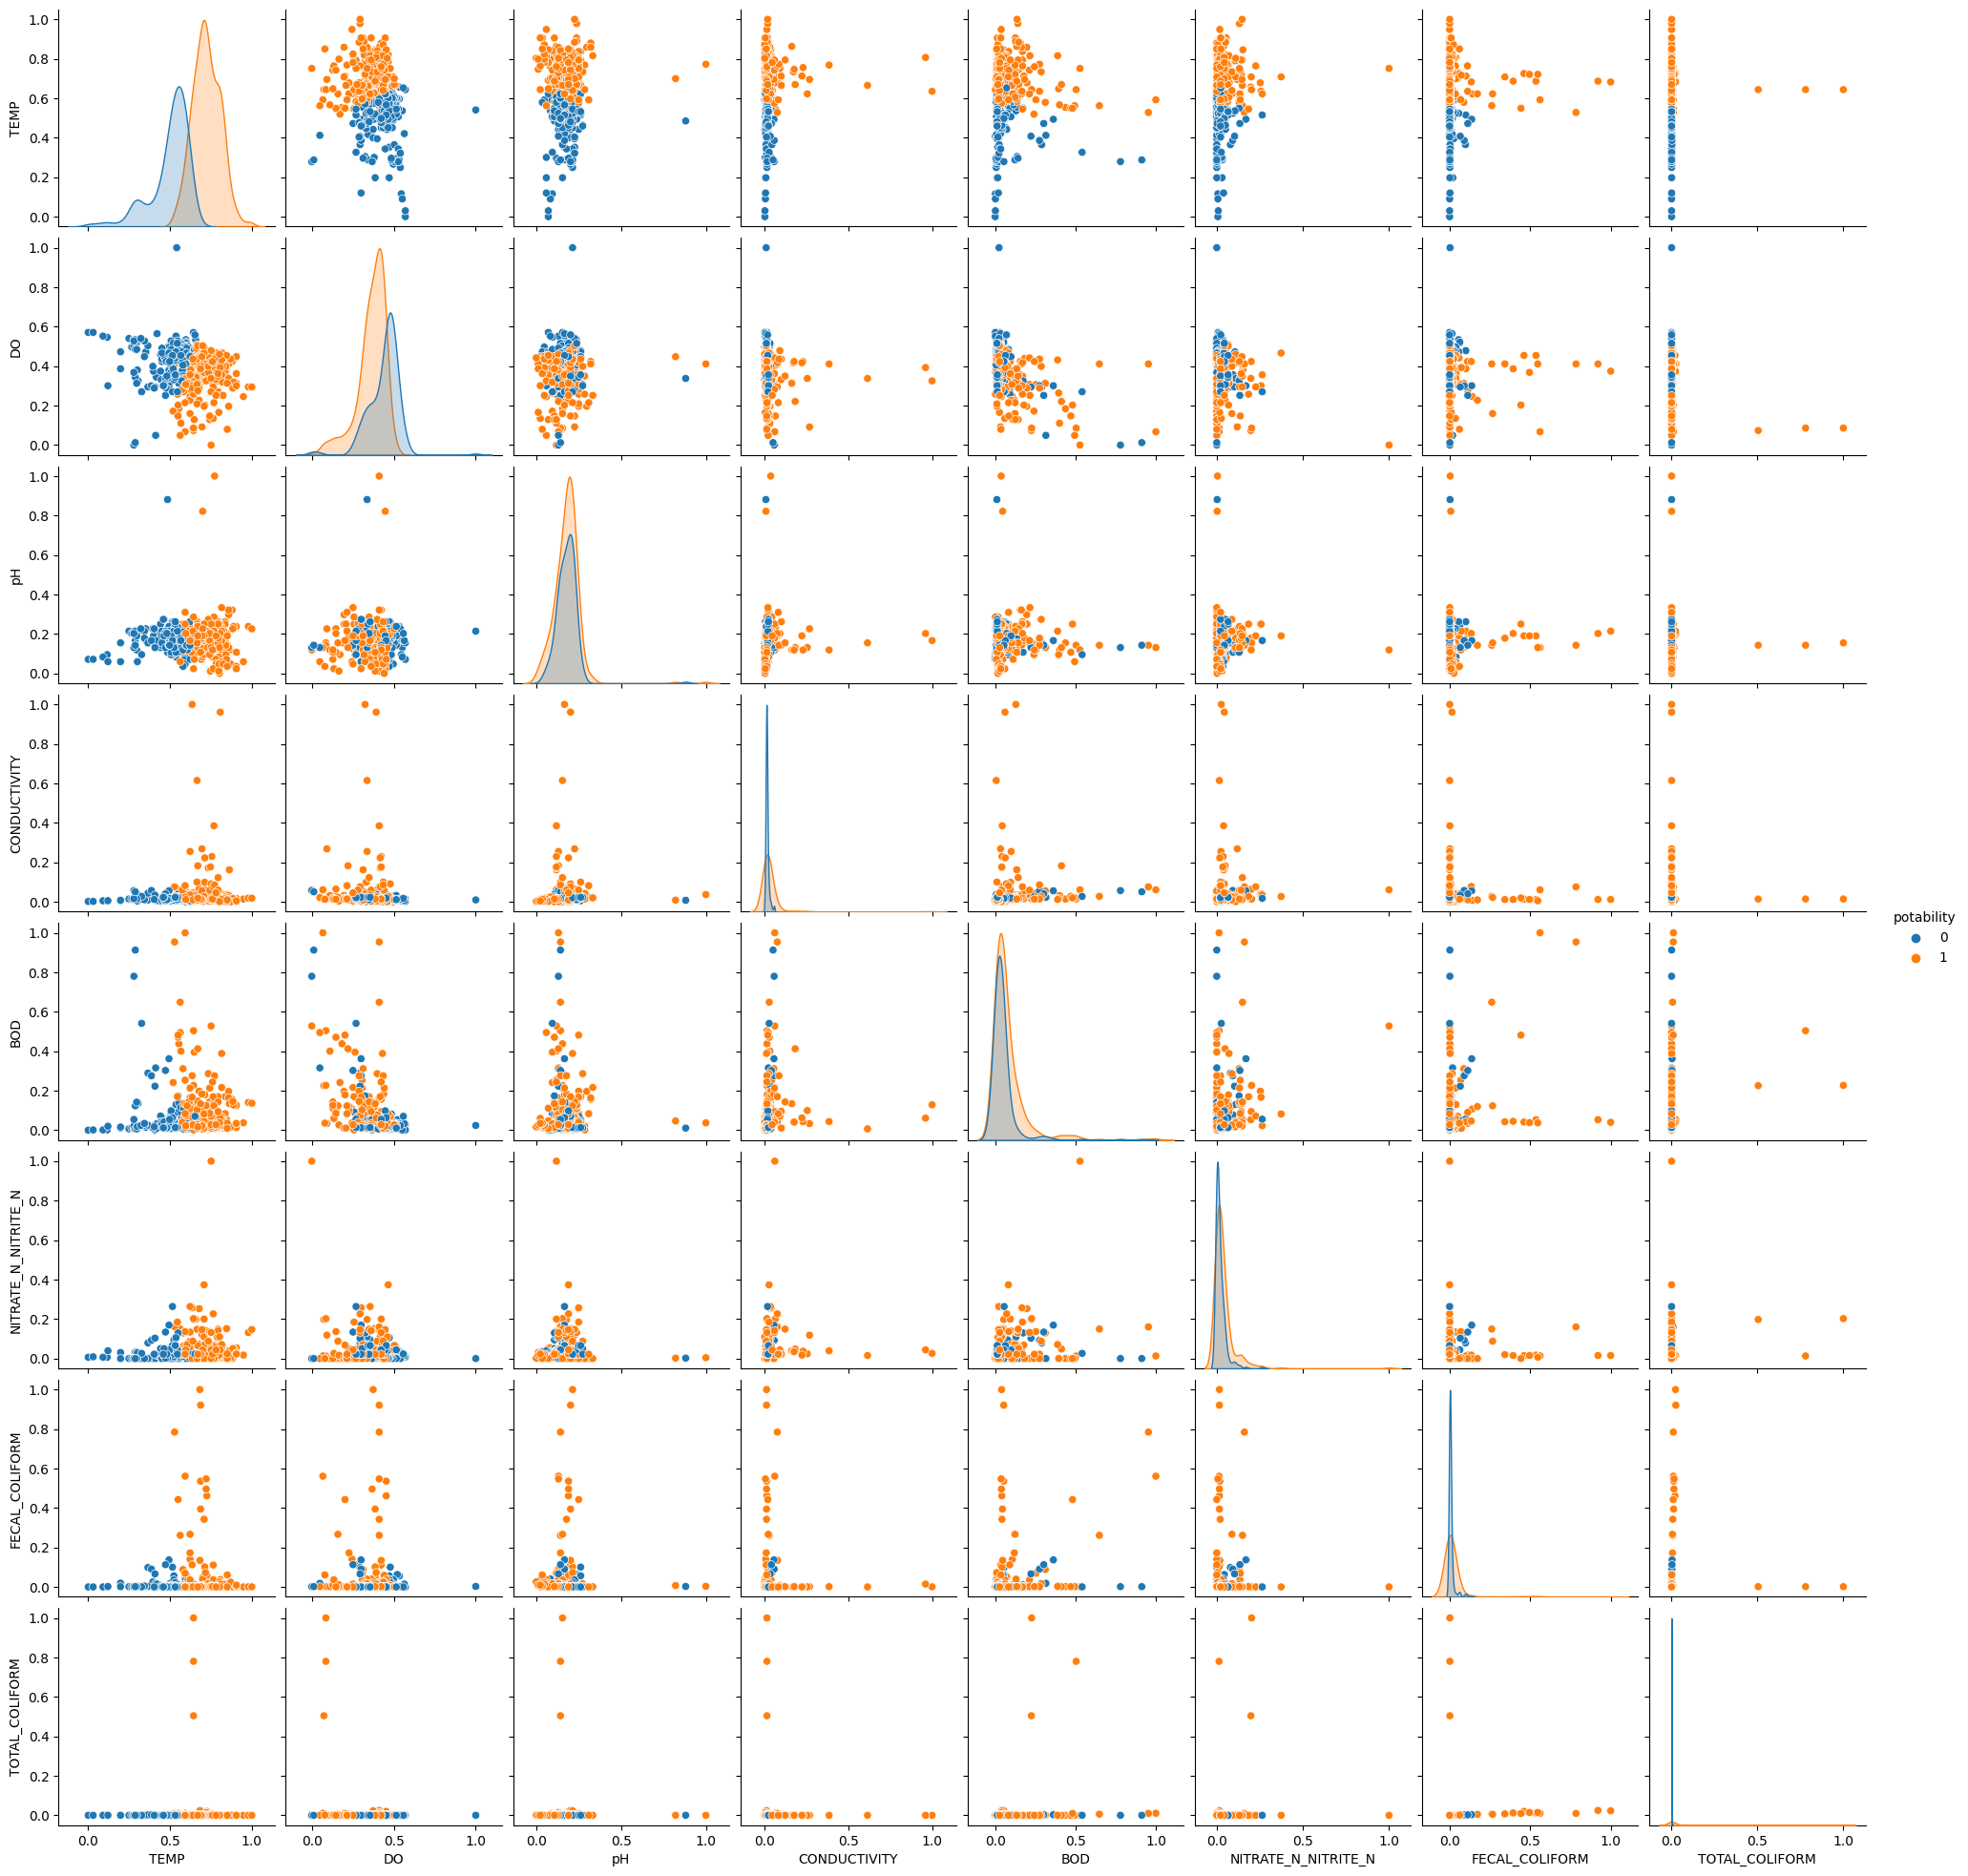

In [37]:
sns.pairplot(output, hue="potability")


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TEMP                 534 non-null    float64
 1   DO                   534 non-null    float64
 2   pH                   534 non-null    float64
 3   CONDUCTIVITY         534 non-null    float64
 4   BOD                  534 non-null    float64
 5   NITRATE_N_NITRITE_N  534 non-null    float64
 6   FECAL_COLIFORM       534 non-null    float64
 7   TOTAL_COLIFORM       534 non-null    float64
dtypes: float64(8)
memory usage: 33.5 KB


In [39]:
output.to_csv("waterquality_output.csv")